<a href="https://colab.research.google.com/github/alejabejarano/alejabejarano/blob/main/Trabajo_Final_Econometr%C3%ADa_Avanzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Econometría Avanzada Código:
## María Alejandra Bejarano (202324563)
###Modelo de efectos Fijos y PSM:


### Modelo Panel de datos efectos Fijos

In [ ]:

# Instalar e importar librerías:

!pip install linearmodels
import pandas as pd



In [13]:
df = pd.read_csv('/content/Inclusi_n_Financiera_20250528.csv')
df.head()
df.describe()

,TIPO DE ENTIDAD,CODIGO DE LA ENTIDAD,UNIDAD DE CAPTURA,RENGLON,NRO CORRESPONSALES PROPIOS,NRO CORRESPONSALES TERCERIZADOS,NRO CORRESPONSALES ACTIVOS,NRO CORRESPONSALES,NRO DEPOSITOS,MONTO DEPOSITOS,...,NRO MICROCREDITO> 10SMMLV HASTA 25SMMLV,MONTO MICROCREDI> 10SMMLV HASTA 25SMMLV,NRO MICROCREDITO MUJERES,MONTO MICROCREDITO MUJERES,NRO MICROCREDITO HOMBRES,MONTO MICROCREDITO HOMBRES,NRO TOTAL MICROCREDITO,MONTO TOTAL MICROCREDITO,NRO PROD DEPOSITO NIVEL NACIONAL,MONTO PROD DEPOSITO NIVEL NACIONAL
count,603232.000000,603232.000000,603232.000000,603232.000000,603232.000000,603232.000000,603232.000000,603232.00000,6.032320e+05,6.032320e+05,...,603232.000000,6.032320e+05,603232.000000,6.032320e+05,603232.000000,6.032320e+05,603232.000000,6.032320e+05,6.032320e+05,6.032320e+05
mean,8.947049,27.656316,13.085887,450.665280,1.518853,17.177678,8.785545,19.70910,1.617475e+03,7.855458e+08,...,3.543786,4.355318e+07,14.792562,6.589111e+07,11.265735,6.089629e+07,26.327363,1.346937e+08,1.399190e+08,6.934047e+10
std,24.714455,23.028356,8.743754,314.394986,69.992523,369.589068,211.819952,396.09117,1.135320e+05,5.607540e+10,...,129.240603,1.549773e+09,496.795230,1.980196e+09,375.003762,1.851852e+09,867.208013,4.019025e+09,6.619899e+10,4.003662e+12
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,7.000000,5.000000,175.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,26.000000,11.000000,425.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000,43.000000,21.000000,693.000000,0.000000,1.000000,1.000000,1.00000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
max,128.000000,122.000000,41.000000,999.000000,15386.000000,35484.000000,31699.000000,35484.00000,3.400534e+07,1.709990e+13,...,29325.000000,3.674887e+11,78439.000000,2.827087e+11,62082.000000,3.463338e+11,140529.000000,6.952816e+11,4.219320e+13,6.162038e+14


In [7]:
# Lista de variables con sus tipos
variable_types = df.dtypes.reset_index()
variable_types.columns = ['Variable', 'Tipo de Dato']
display(variable_types)


,Variable,Tipo de Dato
0,TIPO DE ENTIDAD,int64
1,CODIGO DE LA ENTIDAD,int64
2,NOMBRE DE LA ENTIDAD,object
3,FECHA DE CORTE,object
4,UNIDAD DE CAPTURA,int64
...,...,...
82,MONTO MICROCREDITO HOMBRES,float64
83,NRO TOTAL MICROCREDITO,int64
84,MONTO TOTAL MICROCREDITO,float64
85,NRO PROD DEPOSITO NIVEL NACIONAL,float64


In [ ]:
print(df.columns.tolist())

# Lista con los nombres de las columnas:
columnas_originales = [
    'FECHA DE CORTE','DEPARTAMENTO',
    'RENGLON',
    'MUNICIPIO',
    'TIPO DE ENTIDAD',
    'NOMBRE DE LA  ENTIDAD',
    'NRO CORRESPONSALES ACTIVOS',
    'NRO CTA AHORRO MUJERES',
    'NRO CTA AHORRO HOMBRES'
]

df = df[columnas_originales]

# Renombrar columnas:
df = df.rename(columns={
    'FECHA DE CORTE': 'fechacorte',
    'DEPARTAMENTO': 'departamento',
    'RENGLON': 'renglon',
    'MUNICIPIO': 'municipio',
    'TIPO DE ENTIDAD': 'tipoentidad',
    'NOMBRE DE LA  ENTIDAD': 'nombreentidad',
    'NRO CORRESPONSALES ACTIVOS': 'corresactivos',
    'NRO CTA AHORRO MUJERES': 'generonromca',
    'NRO CTA AHORRO HOMBRES': 'generonrohca'
})


print(df.head())



In [ ]:
# Definir nueva variable:

import numpy as np

df['brechait'] = np.where(
    (df['generonromca'] + df['generonrohca']) == 0,
    0,
    (df['generonromca'] - df['generonrohca']) / (df['generonromca'] + df['generonrohca'])
)

df[['generonromca', 'generonrohca', 'brechait']].head()



In [ ]:
print(df.columns.tolist())



In [ ]:
# Convertir 'fechacorte' a formato datetime:
df['fechacorte'] = pd.to_datetime(df['fechacorte'], errors='coerce')


df_panel = df.set_index(['renglon', 'fechacorte'])

print(df_panel.index.levels)


In [17]:
# Ejecutar modelo de panel de datos:
import statsmodels.api as sm
from linearmodels.panel import PanelOLS

variables_modelo = ['brechait', 'corresactivos']

df_panel = df_panel[variables_modelo].dropna(how='any')

exog = sm.add_constant(df_panel['corresactivos'])

modelo_fe = PanelOLS(df_panel['brechait'], exog, entity_effects=True)
resultado = modelo_fe.fit(cov_type='clustered', cluster_entity=True)

print(resultado.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:               brechait   R-squared:                     2.936e-07
Estimator:                   PanelOLS   R-squared (Between):             -0.0048
No. Observations:              603232   R-squared (Within):            2.936e-07
Date:                Thu, May 29 2025   R-squared (Overall):           2.933e-06
Time:                        00:14:52   Log-likelihood                 9.518e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      0.1769
Entities:                         589   P-value                           0.6740
Avg Obs:                       1024.2   Distribution:                F(1,602642)
Min Obs:                       1.0000                                           
Max Obs:                    5.352e+04   F-statistic (robust):             1.6829
                            

## Modelo Propensity Score

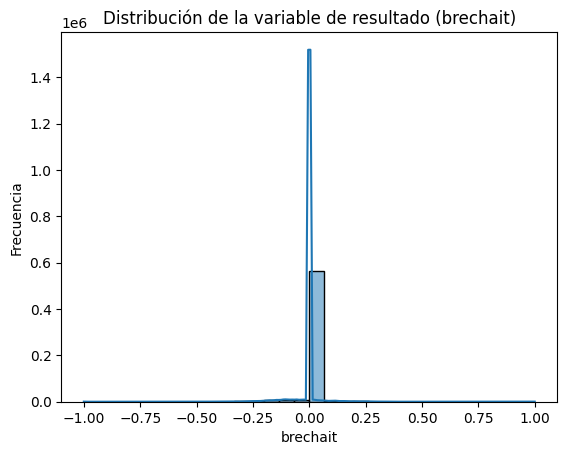

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diagnóstico
# print(df['brechait'].describe())
# print(df['brechait'].value_counts(dropna=False))

# Histograma
sns.histplot(df['brechait'], kde=True, bins=30)
plt.title('Distribución de la variable de resultado (brechait)')
plt.xlabel('brechait')
plt.ylabel('Frecuencia')
plt.show()


Estimar la ecuación de participación y obtener el Propensity Score

In [1]:
import pandas as pd
df = pd.read_csv('/content/Inclusi_n_Financiera_20250528.csv')
df.head()
df.describe()



df['treatment'] = (df['NRO CORRESPONSALES ACTIVOS'] > 0).astype(int)


In [2]:
# Definir nueva variable:
import numpy as np

df.columns = df.columns.str.strip()


mujeres = df['NRO CTA AHORRO ELECTRONICAS MUJERES']
hombres = df['NRO CTA AHORRO ELECTRONICAS HOMBRES']
total = mujeres + hombres


df['brechait'] = np.where(
    total != 0,
    (mujeres - hombres) / total,
    0
)


In [ ]:
list(df.columns)


In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Covariables
covariables = [
    'NRO CORRESPONSALES ACTIVOS',
    'NRO DEPOSITOS',
    'MONTO DEPOSITOS'
]

df_clean = df.dropna(subset=covariables + ['treatment', 'brechait']).copy()

X = df_clean[covariables]
y = df_clean['treatment']

# Ajustar modelo logístico para propensity score
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Guardar propensity scores
df_clean['pscore'] = model.predict_proba(X)[:, 1]

print(df_clean[['pscore', 'treatment']].head())



     pscore  treatment
0  0.000987          0
1  0.000000          0
2  0.000987          0
3  0.000987          0
4  0.995554          1


In [9]:
print("Media brechait - Tratados:", treated['brechait'].mean())
print("Media brechait - Controles:", control['brechait'].mean())


Media brechait - Tratados: 0.0
Media brechait - Controles: 0.018338558974902212


In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors


variables = [
    'NRO CORRESPONSALES ACTIVOS',
    'NRO DEPOSITOS',
    'MONTO DEPOSITOS',
    'treatment',
    'brechait'
]

df_clean = df[variables].dropna()

# Separar X (covariables) y y (tratamiento)
X = df_clean.drop(columns=['treatment', 'brechait'])
y = df_clean['treatment']

# Estandarizar covariables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Estimar propensity scores con regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)
df_clean['propensity_score'] = model.predict_proba(X_scaled)[:, 1]

# Separar tratados y controles
tratados = df_clean[df_clean['treatment'] == 1].copy()
controles = df_clean[df_clean['treatment'] == 0].copy()

# Matching 1:1 por Nearest Neighbor con pscore
nn = NearestNeighbors(n_neighbors=1)
nn.fit(controles[['propensity_score']])
distancias, indices = nn.kneighbors(tratados[['propensity_score']])

# Emparejar controles
controles_matched = controles.iloc[indices.flatten()].copy()

# Concatenar datos emparejados
matched_data = pd.concat([
    tratados.reset_index(drop=True),
    controles_matched.reset_index(drop=True)
])

# Calcular ATT
att = matched_data.loc[matched_data['treatment'] == 1, 'brechait'].values - \
      matched_data.loc[matched_data['treatment'] == 0, 'brechait'].values
att_promedio = np.mean(att)

print(f"ATT estimado: {att_promedio:.4f}")

# Bootstrap

n_iterations = 1000
np.random.seed(123)
atts_boot = []


tratados_matched = matched_data.iloc[:len(tratados)].reset_index(drop=True)
controles_matched = matched_data.iloc[len(tratados):].reset_index(drop=True)

for _ in range(n_iterations):
    sample_idx = np.random.choice(len(tratados), size=len(tratados), replace=True)
    att_sample = tratados_matched.loc[sample_idx, 'brechait'].values - \
                 controles_matched.loc[sample_idx, 'brechait'].values
    atts_boot.append(np.mean(att_sample))

# Intervalo de confianza al 95%
ci_lower = np.percentile(atts_boot, 2.5)
ci_upper = np.percentile(atts_boot, 97.5)

print(f"Intervalo de confianza del 95% para el ATT: [{ci_lower:.4f}, {ci_upper:.4f}]")



ATT estimado: 0.0000
Intervalo de confianza del 95% para el ATT: [0.0000, 0.0000]


Random forest

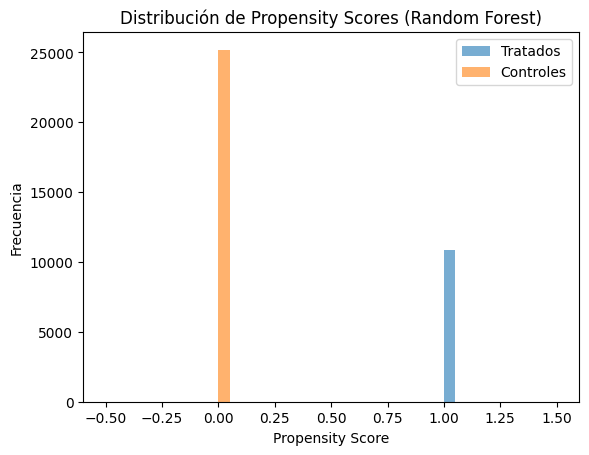

ATT estimado (RandomForest): 0.0000


In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selección de variables
variables = [
    'NRO CORRESPONSALES ACTIVOS',
    'NRO DEPOSITOS',
    'MONTO DEPOSITOS',
    'treatment',
    'brechait'
]

# Filtrar y limpiar
df_clean = df[variables].dropna()

# Separar covariables y tratamiento
X = df_clean.drop(columns=['treatment', 'brechait'])
y = df_clean['treatment']

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Estimar propensity score con RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
df_clean['propensity_score'] = rf.predict_proba(X_scaled)[:, 1]

# Distribución del propensity score
plt.hist(df_clean[df_clean['treatment'] == 1]['propensity_score'], bins=20, alpha=0.6, label='Tratados')
plt.hist(df_clean[df_clean['treatment'] == 0]['propensity_score'], bins=20, alpha=0.6, label='Controles')
plt.xlabel('Propensity Score')
plt.ylabel('Frecuencia')
plt.title('Distribución de Propensity Scores (Random Forest)')
plt.legend()
plt.show()

# Emparejamiento 1:1 usando Nearest Neighbors
tratados = df_clean[df_clean['treatment'] == 1].copy()
controles = df_clean[df_clean['treatment'] == 0].copy()

nn = NearestNeighbors(n_neighbors=1)
nn.fit(controles[['propensity_score']])
distancias, indices = nn.kneighbors(tratados[['propensity_score']])

# Crear dataframe emparejado
controles_matched = controles.iloc[indices.flatten()].copy()
matched_data = pd.concat([tratados.reset_index(drop=True), controles_matched.reset_index(drop=True)])

# Calcular ATT
att = matched_data.loc[matched_data['treatment'] == 1, 'brechait'].values - \
      matched_data.loc[matched_data['treatment'] == 0, 'brechait'].values
att_promedio = np.mean(att)
print(f"ATT estimado (RandomForest): {att_promedio:.4f}")
